<a href="https://colab.research.google.com/github/allanspadini/livro-val-allan/blob/main/capitulo5/capitulo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Capítulo 5 - Outliers**

###**Tratamento de Outliers**

In [67]:
df_treino.head()

,ds,y
77110,1832-01-01,24.935
77111,1832-02-01,24.505
77112,1832-03-01,24.617
77113,1832-04-01,23.990
77114,1832-05-01,23.124


In [68]:
novo_y = df_treino.reset_index()
novo_y.head(3)

,index,ds,y
0,77110,1832-01-01,24.935
1,77111,1832-02-01,24.505
2,77112,1832-03-01,24.617


In [71]:
sem_outliers = novo_y[(novo_y['y']> previsao['yhat_lower'][:2000]) & (novo_y['y'] < previsao['yhat_upper'][:2000])]
sem_outliers.head(3)

,index,ds,y
0,77110,1832-01-01,24.935
1,77111,1832-02-01,24.505
2,77112,1832-03-01,24.617


In [72]:
df_sem_outliers = sem_outliers[['ds','y']]

In [73]:
df_sem_outliers.head()

,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124


Rodando o modelo sem os outliers:

In [59]:
modelo = Prophet() 
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlea630e/3n1dlrs7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlea630e/0odekugx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32708', 'data', 'file=/tmp/tmpmlea630e/3n1dlrs7.json', 'init=/tmp/tmpmlea630e/0odekugx.json', 'output', 'file=/tmp/tmpubupkbys/prophet_model-20220927132340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:23:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


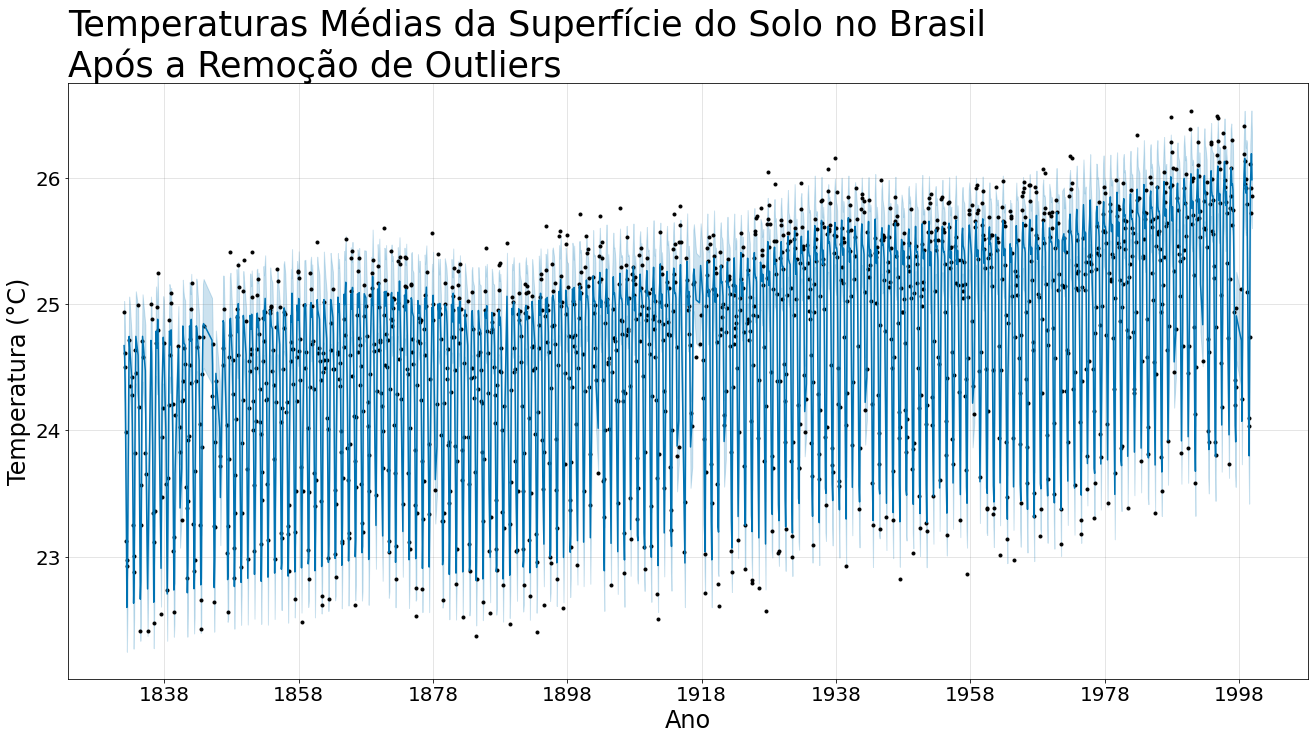

In [60]:
modelo.plot(previsao, figsize=(18,9));
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Temperaturas Médias da Superfície do Solo no Brasil \nApós a Remoção de Outliers', loc = 'left', fontsize = 35)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

In [62]:
mean_squared_error(y_true = df_sem_outliers['y'], y_pred=previsao['yhat'][:1628])

0.0762517018985251

###**Intervalo de Confiança**

In [76]:
modelo = Prophet() 
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=300, freq='M')
previsao = modelo.predict(dataframefuturo)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlea630e/7e48muca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmlea630e/6i0pvosf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53863', 'data', 'file=/tmp/tmpmlea630e/7e48muca.json', 'init=/tmp/tmpmlea630e/6i0pvosf.json', 'output', 'file=/tmp/tmpth4rw890/prophet_model-20220927132823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


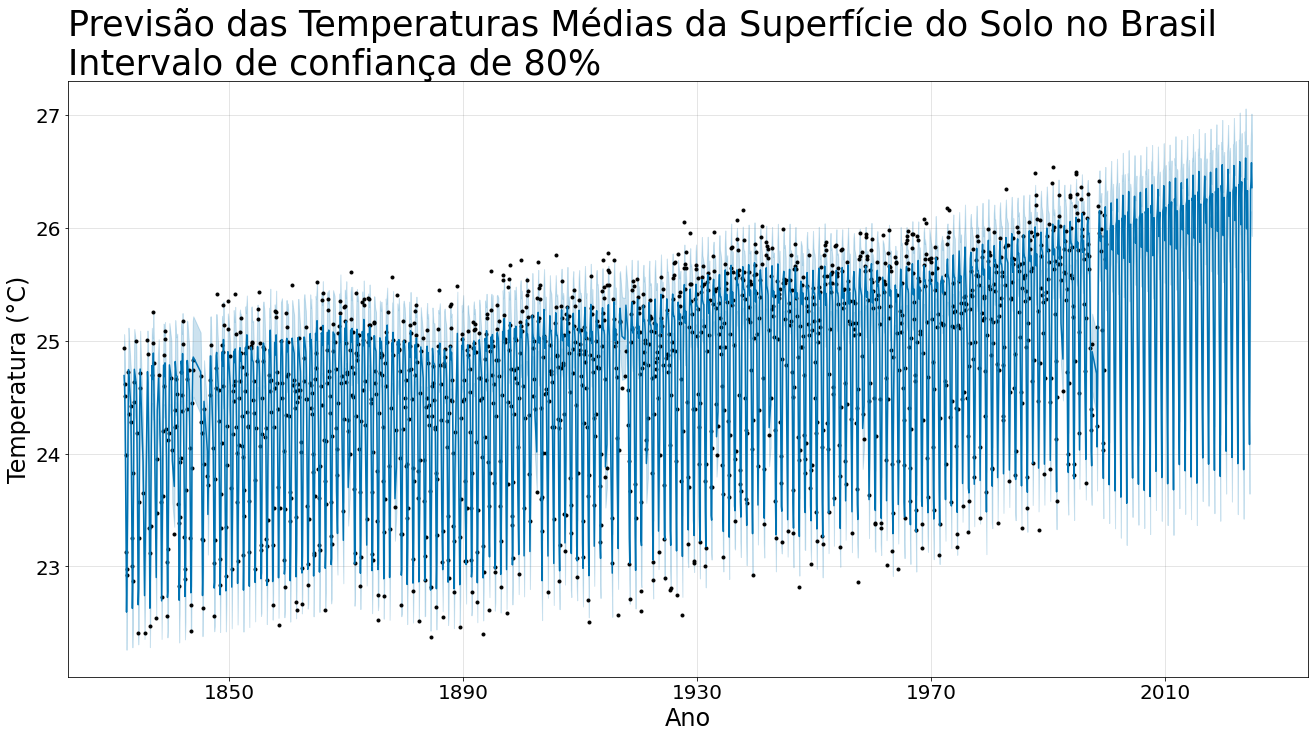

In [77]:
modelo.plot(previsao, figsize=(18,9));
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil \nIntervalo de confiança de 80%', loc = 'left', fontsize = 35)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

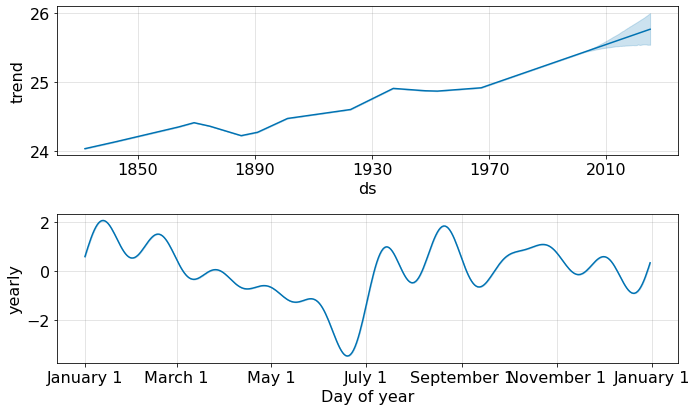

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

In [ ]:
modelo = Prophet(interval_width=0.95) 
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=300, freq = 'M')
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


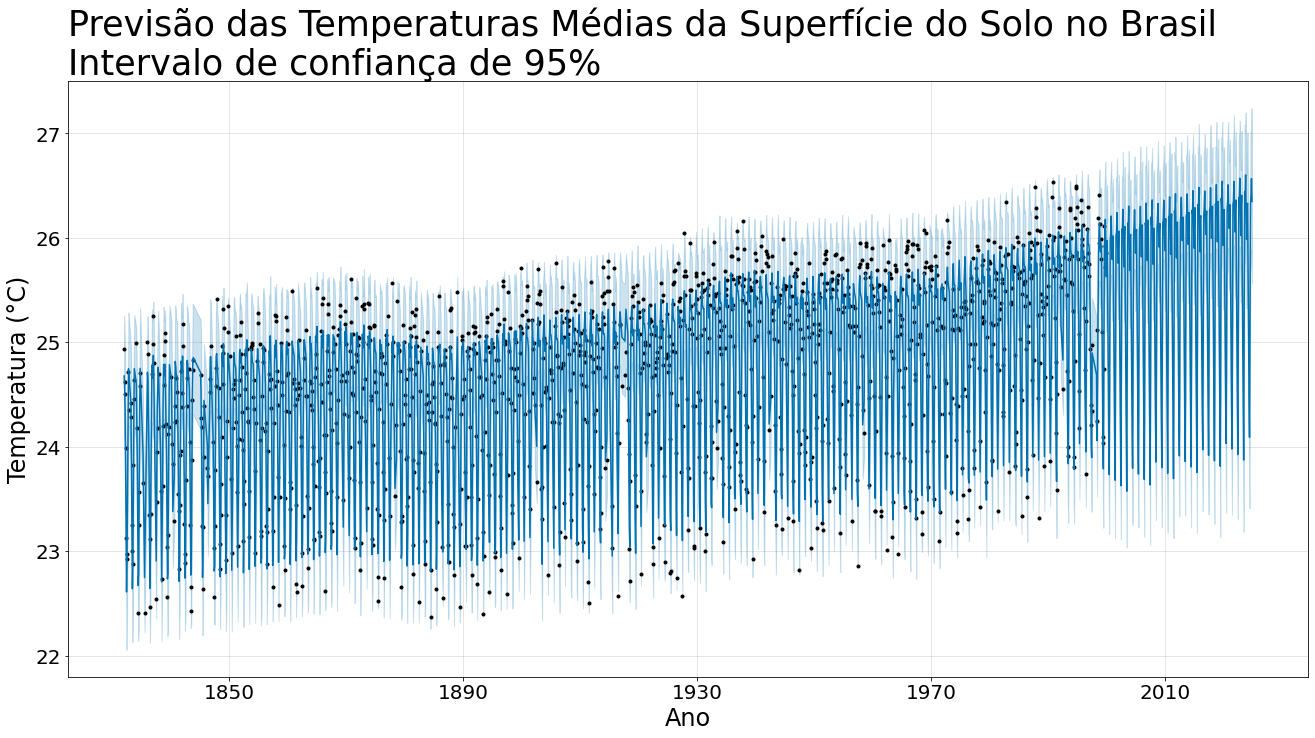

In [ ]:
modelo.plot(previsao, figsize=(18,9));
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil \nIntervalo de confiança de 95%', loc = 'left', fontsize = 35)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

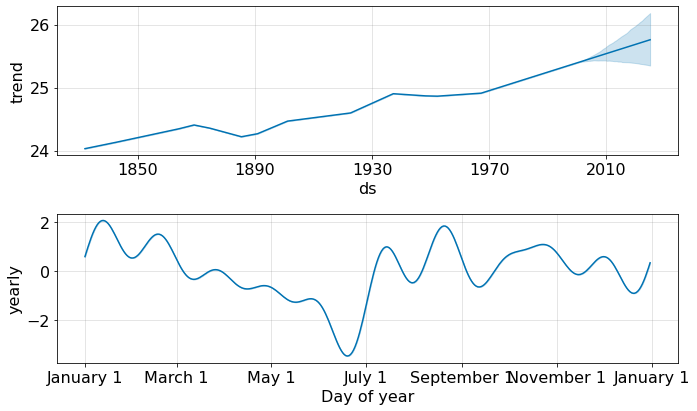

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

In [ ]:
amostras = modelo.predictive_samples(previsao)

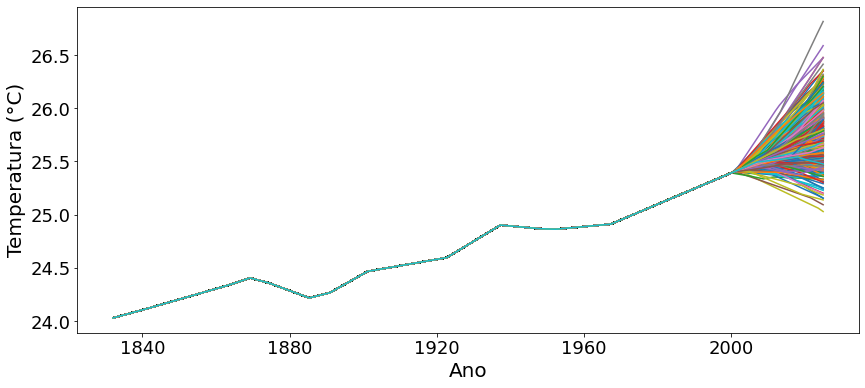

In [ ]:
plt.plot(previsao['ds'],amostras['trend']);
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)
plt.show()